# **Set up**

*This* project requires Python 3.7 or above:

In [1]:
import sys

assert sys.version_info >= (3, 7)

**It** also requires Scikit-Learn ≥ 1.0.1:

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

**And** TensorFlow ≥ 2.8:

In [3]:
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

Let's define the default font sizes to make the figures prettier:

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Regression MLPs (Multi-Layer Perceptron)

In [5]:
# Import necessary libraries and modules
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset
housing = fetch_california_housing()

# Split the dataset into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

# Further split the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Create an MLPRegressor with 3 hidden layers, each containing 50 neurons
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)

# Create a StandardScaler for feature scaling
scaler = StandardScaler()

# Create a pipeline that first scales the features using StandardScaler
# and then applies the MLPRegressor
pipeline = make_pipeline(scaler, mlp_reg)

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = pipeline.predict(X_valid)

# Calculate the Root Mean Squared Error (RMSE) between the predicted and actual values
rmse = mean_squared_error(y_valid, y_pred, squared=False)

# Display the RMSE as the result
print(rmse)


0.5053326657968679


# Implementing MLPs with Keras


In [6]:
# Import necessary libraries and modules
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
# Load the California housing dataset
housing = fetch_california_housing()

## **Dataset Insights**

In [8]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [9]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## **Test, Train and Validation split**


In [10]:
# Split the dataset into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

# Further split the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [11]:
# Standardize the input features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

## **Build Model Function [To chaneg the number of neurons, activation function and optimizer]**

In [42]:

def build_model(neurons, activation, optimizer):
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),  # Input layer
        layers.Dense(neurons, activation=activation),  # Hidden layer with specified neurons and activation
        layers.Dense(neurons, activation=activation),  # Another hidden layer with specified neurons and activation
        layers.Dense(1)  # Output layer (1 neuron for regression)
    ])

    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

## **Model Checkpoint - CallBack**

In [33]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_model.h5", save_best_only=True)

## **Early Stopping - CallBack**

In [34]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

## **Model Parameters - Build**


In [43]:
model = build_model(neurons=20, activation='relu', optimizer='SGD')

## **Model Summary**

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                450       
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3051 (11.92 KB)
Trainable params: 3051 (11.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


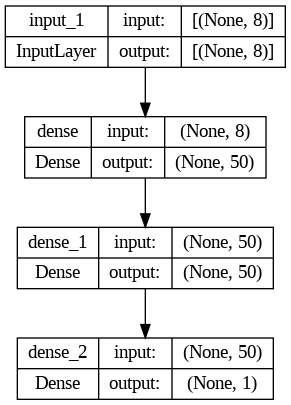

In [17]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(model, "my_california_housing_prediction_model.png", show_shapes=True)

## **Model Training**

In [44]:
# Train the model on the scaled training data with callbacks
model_history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/50
363/363 [==============================] - 1s 3ms/step - loss: 0.8224 - val_loss: 0.4930
Epoch 2/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4319 - val_loss: 0.3869
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4008 - val_loss: 0.4972
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3816 - val_loss: 0.5629
Epoch 5/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3768 - val_loss: 0.3870
Epoch 6/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3660 - val_loss: 1.7548
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3618 - val_loss: 1.6385
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3660 - val_loss: 2.1056
Epoch 9/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3659 - val_loss: 1.2447
Epoch 10/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3532 - val_loss: 0.4472

In [38]:
model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 363}

In [39]:
print(model_history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


## **Plotting the Training and Prediction insights**

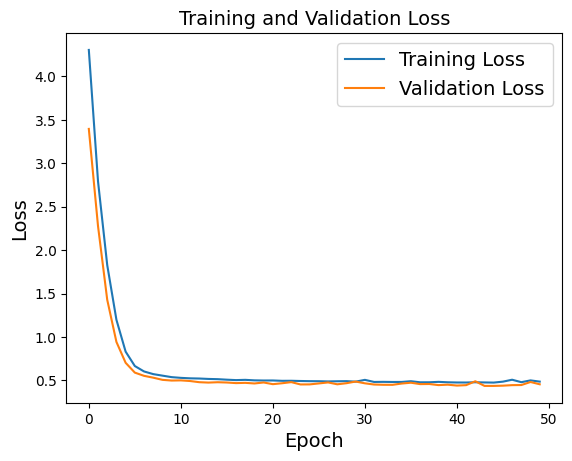

In [40]:
# Display training and validation loss
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

162/162 [==============================] - 1s 1ms/step


<ipython-input-22-506cca7972b1>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='red', label='Perfect Prediction')


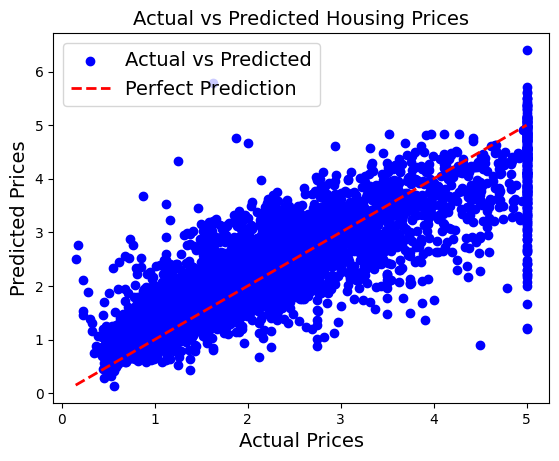

In [22]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Display actual vs predicted housing prices with different colors
plt.scatter(y_test, y_pred, c='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='red', label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Housing Prices')
plt.legend()
plt.show()

162/162 [==============================] - 0s 1ms/step


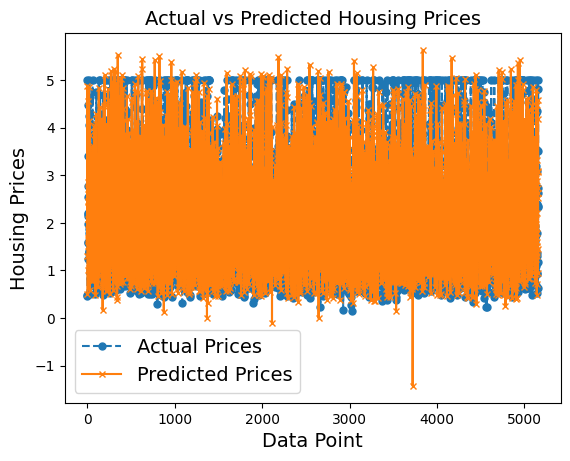

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Display a line plot of predicted housing prices
plt.plot(y_test, label='Actual Prices', linestyle='--', marker='o', markersize=5)
plt.plot(y_pred, label='Predicted Prices', linestyle='-', marker='x', markersize=5)
plt.xlabel('Data Point')
plt.ylabel('Housing Prices')
plt.title('Actual vs Predicted Housing Prices')
plt.legend()
plt.show()

In [41]:
# Evaluate the model on the test set
mse = model.evaluate(X_test_scaled, y_test)
rmse = np.sqrt(mse)
print("Root Mean Squared Error on Test Set:", rmse)

162/162 [==============================] - 0s 2ms/step - loss: 0.4780
Root Mean Squared Error on Test Set: 0.6913974998480781
